In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq

In [359]:
df = pd.read_csv('GP49single pulse-1.dat', sep="\s+", header=[0,1])

In [360]:
df.head()

,Time,Thermocouple1,Thermocouple2,Thermocouple3,Thermocouple4,Thermocouple5,Thermocouple6,Thermocouple7,Thermocouple8,Thermocouple9,Thermocouple10,Thermocouple11,Thermocouple12,Thermocouple13,Thermocouple14
,seconds,Celsius,Celsius,Celsius,Celsius,Celsius,Celsius,Celsius,Celsius,Celsius,Celsius,Celsius,Celsius,Celsius,Celsius
0,77.62076,21.27105,21.07285,20.83062,20.55713,20.71317,21.06918,21.28940,21.45089,21.15361,20.99212,20.80126,20.51498,20.48562,20.87834
1,80.12101,21.26753,21.07301,20.83444,20.55729,20.70966,21.07668,21.28955,21.44737,21.15376,20.99594,20.80508,20.52247,20.48577,20.87849
2,82.62126,21.26752,21.07299,20.83076,20.56475,20.71698,21.07667,21.29321,21.44736,21.15375,20.98859,20.80141,20.51880,20.48944,20.87481
3,85.12151,21.26767,21.07315,20.83091,20.56117,20.71347,21.07315,21.29336,21.45119,21.15390,20.98874,20.80156,20.51528,20.48959,20.86762
4,87.62076,21.27509,21.07323,20.83834,20.56872,20.71722,21.08424,21.30078,21.45126,21.16132,20.98882,20.80897,20.51535,20.48966,20.88238


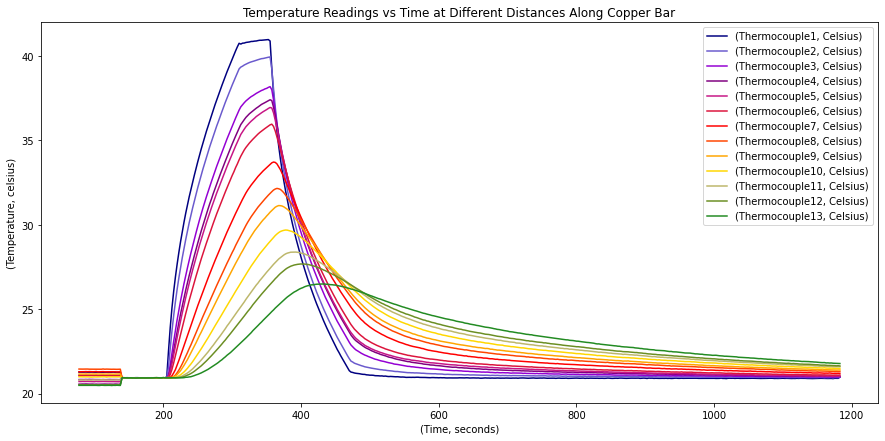

In [361]:
plt.rcParams["figure.figsize"]=[15,7]
ax = plt.gca()
df.plot(0, 1, color='navy', ax=ax)
df.plot(0, 2, color='slateblue', ax=ax)
df.plot(0, 3, color='darkviolet', ax=ax)
df.plot(0, 4, color='purple', ax=ax)
df.plot(0, 5, color='mediumvioletred', ax=ax)
df.plot(0, 6, color='crimson', ax=ax)
df.plot(0, 7, color='red', ax=ax)
df.plot(0, 8, color='orangered', ax=ax)
df.plot(0, 9, color='orange', ax=ax)
df.plot(0, 10, color='gold', ax=ax)
df.plot(0, 11, color='darkkhaki', ax=ax)
df.plot(0, 12, color='olivedrab', ax=ax)
df.plot(0, 13, color='forestgreen', ax=ax)
plt.ylabel("(Temperature, celsius)")
plt.title("Temperature Readings vs Time at Different Distances Along Copper Bar")
plt.legend()
# plt.savefig("Fig1")

[ 0.4        21.99746836]
[[inf inf]
 [inf inf]]


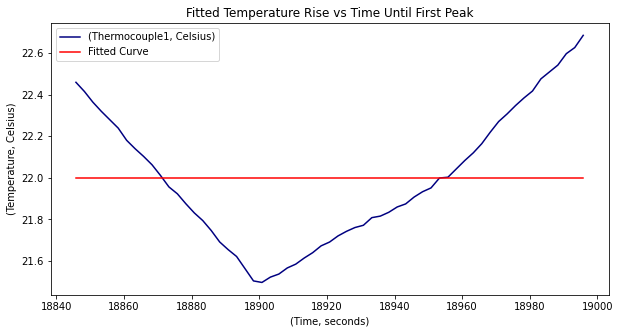

In [347]:
plt.rcParams["figure.figsize"]=[10,5]
data = df.iloc[18:79, :2]
def func(x, a, b):
    return b*(1-np.exp(-1*a*x))
popt, pcov = curve_fit(func, data.iloc[:,0], data.iloc[:,1], p0=[0.4, 29])
ax2 = plt.gca()
data.plot(0, 1, color='navy', ax=ax2)
x = np.array(data.iloc[:,0])
y = np.array([func(xi, popt[0],popt[1]) for xi in x])
plt.plot(x,y ,color='red', label='Fitted Curve')
plt.ylabel("(Temperature, Celsius)")
plt.title("Fitted Temperature Rise vs Time Until First Peak")
plt.legend()
print(popt)
print(pcov)
# plt.savefig("Fig2")

Text(0.5, 1.0, 'Fourier Transform (Square, 20min)')

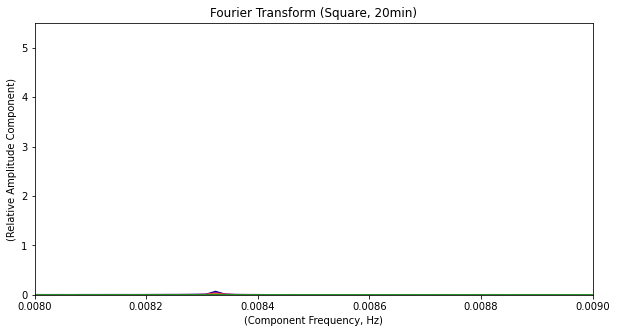

In [351]:
plt.rcParams["figure.figsize"]=[10,5]
colors = ['navy', 'slateblue', 'darkviolet', 'purple', 'mediumvioletred','crimson','red','orangered', 'orange', 'gold','darkkhaki','olivedrab','forestgreen']
N = df.iloc[:,0].count()
d = 2.5
for i in range(1,14,2):
    thermocouple = df.iloc[18:, :]
    x = np.array(thermocouple.iloc[:,0])
    y = np.array(thermocouple.iloc[:,i])
    yf = fft(y)
    xf = fftfreq(N, d)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), color = colors[i-1])
    plt.ylim((0,5.5))
    plt.xlim((0.008, 0.009))
plt.xlabel("(Component Frequency, Hz)")
plt.ylabel("(Relative Amplitude Component)")
plt.title("Fourier Transform (Square, 20min)")
# plt.savefig("Square20")

In [352]:
N = df.iloc[:,0].count()
d = 2.5
values = np.zeros([13,3])
for i in range(1,14):
    thermocouple = df.iloc[18:, :]
    x = np.array(thermocouple.iloc[:,0])
    y = np.array(thermocouple.iloc[:,i])
    yf = fft(y)
    yf = 2.0/N * np.abs(yf[0:N//2])
    xf = fftfreq(N, d)[:N//2]
    min1 = next(i for i, x in enumerate(xf) if x >= 0.001)
    max1 = next(i for i, x in enumerate(xf) if x >= 0.002)
    values[i-1,0]=max(yf[min1:max1])
    min2 = next(i for i, x in enumerate(xf) if x >= 0.004)
    max2 = next(i for i, x in enumerate(xf) if x >= 0.006)
    values[i-1,1]=max(yf[min2:max2])
    min3 = next(i for i, x in enumerate(xf) if x >= 0.008)
    max3 = next(i for i, x in enumerate(xf) if x >= 0.009)
    values[i-1,2]=max(yf[min3:max3])

[-12.80780868  -2.5697654 ]
[[ 0.12940905 -0.01466304]
 [-0.01466304  0.00235259]]


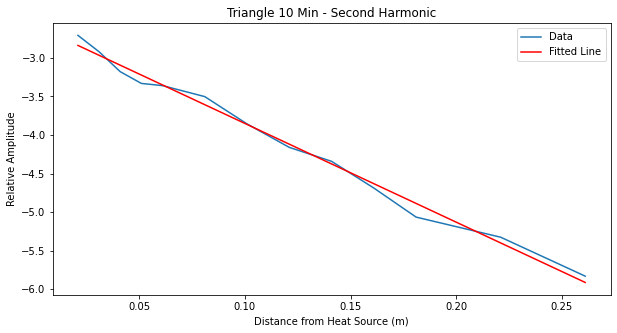

In [358]:
distances = np.array([0.021,0.031,0.041,0.051,0.061,0.081,0.101,0.121,0.141,0.161,0.181,0.221,0.261])
# distances = distances[:11]
log_a = np.log(values[:,2])
# log_a = log_a[:11]
plt.plot(distances,log_a, label='Data')
def func(x, a, b):
    return a*x + b
popt, pcov = curve_fit(func, distances, log_a, p0=[-0.01, 150])
ax2 = plt.gca()
y = np.array([func(xi, popt[0],popt[1]) for xi in distances])
plt.plot(distances,y ,color='red', label='Fitted Line')

print(popt)
print(pcov)
plt.xlabel("Distance from Heat Source (m)")
plt.ylabel("Relative Amplitude")
plt.title("Triangle 10 Min - Second Harmonic")
plt.legend()
plt.savefig("15")

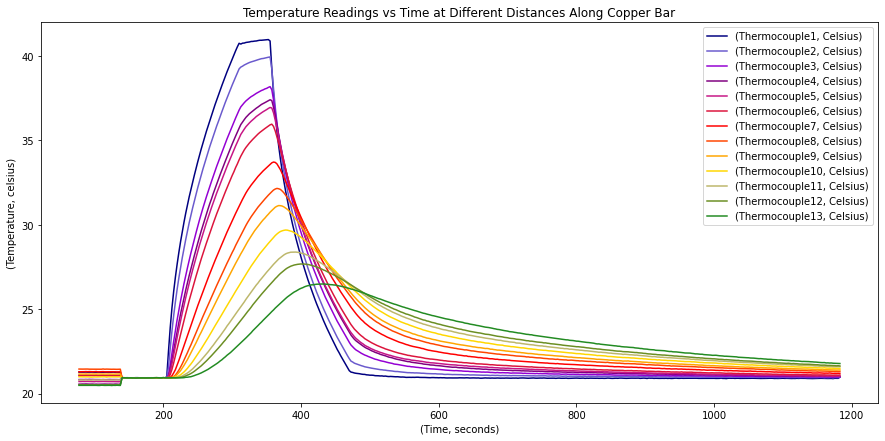

In [440]:
plt.rcParams["figure.figsize"]=[15,7]
ax = plt.gca()
df.plot(0, 1, color='navy', ax=ax)
df.plot(0, 2, color='slateblue', ax=ax)
df.plot(0, 3, color='darkviolet', ax=ax)
df.plot(0, 4, color='purple', ax=ax)
df.plot(0, 5, color='mediumvioletred', ax=ax)
df.plot(0, 6, color='crimson', ax=ax)
df.plot(0, 7, color='red', ax=ax)
df.plot(0, 8, color='orangered', ax=ax)
df.plot(0, 9, color='orange', ax=ax)
df.plot(0, 10, color='gold', ax=ax)
df.plot(0, 11, color='darkkhaki', ax=ax)
df.plot(0, 12, color='olivedrab', ax=ax)
df.plot(0, 13, color='forestgreen', ax=ax)
plt.ylabel("(Temperature, celsius)")
plt.title("Temperature Readings vs Time at Different Distances Along Copper Bar")
plt.legend()
plt.savefig("A")

No handles with labels found to put in legend.
[0.0029823  0.04982291]
[[ 1.13445382e-07 -2.41493478e-06]
 [-2.41493478e-06  1.11148105e-04]]


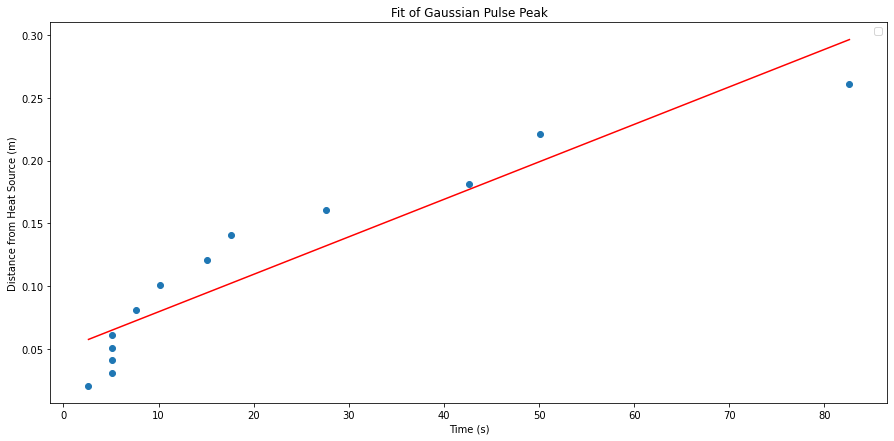

In [441]:
distances = np.array([0.021,0.031,0.041,0.051,0.061,0.081,0.101,0.121,0.141,0.161,0.181,0.221,0.261])
peak_time = []
thermocouple = df.iloc[18:, :]
for i in range(1,14):
    t = np.array(thermocouple.iloc[:,0])
    T = np.array(thermocouple.iloc[:,i])
    index = np.argmax(T)
    peak_time.append(t[index]-350)
plt.scatter(peak_time,distances)
def func(x, a, b):
    return a*x + b
popt, pcov = curve_fit(func, peak_time, distances, p0=[-0.01, 150])
ax2 = plt.gca()
y = np.array([func(xi, popt[0],popt[1]) for xi in peak_time])
plt.plot(peak_time,y ,color='red')

print(popt)
print(pcov)
plt.ylabel("Distance from Heat Source (m)")
plt.xlabel("Time (s)")
plt.title("Fit of Gaussian Pulse Peak")
plt.legend()
plt.savefig("B")

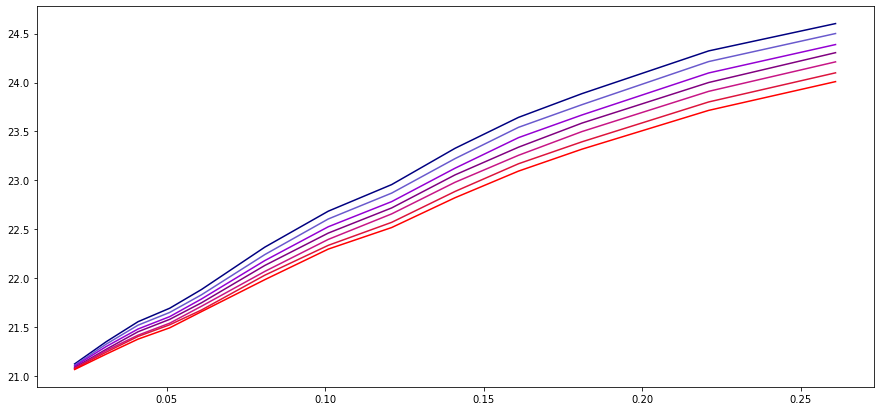

In [442]:
thermocouple = df.iloc[18:, :]
c = 0
ts = np.array(thermocouple.iloc[:,0])
t_indexs = [200,205,210,215,220,225,230]
for i in t_indexs:
    T = np.array(thermocouple.iloc[i, 2:])
    distances = np.array([0.021,0.031,0.041,0.051,0.061,0.081,0.101,0.121,0.141,0.161,0.181,0.221,0.261])
    plt.plot(distances, T, color = colors[c])
    c = c+1
plt.savefig('C')

[ 0.02595685 -0.20599618]
[[ 5.90464238e-07 -1.51682535e-05]
 [-1.51682535e-05  3.89792445e-04]]


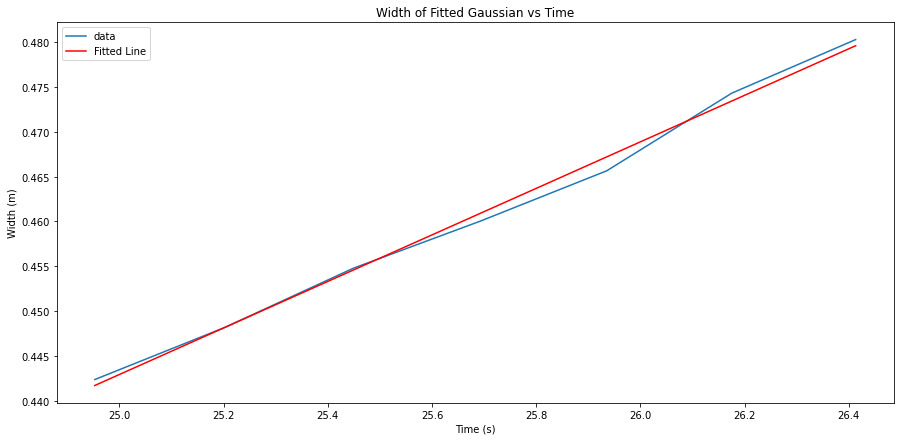

In [443]:
thermocouple = df.iloc[18:, :]
c = 0
ts = np.array(thermocouple.iloc[:,0])
t_indexs = [200,205,210,215,220,225,230]
width = []
time = []
errors = []

def func(x, a, b):
    C = b/(a * ((2*np.pi)**(1/2)))
    E = (-1/2)*(((x-mean)/a)**2)
    return C * np.exp(E)

for i in t_indexs:
    T = np.array(thermocouple.iloc[i, 2:])
    d = np.array([0.021,0.031,0.041,0.051,0.061,0.081,0.101,0.121,0.141,0.161,0.181,0.221,0.261])
    mean = d[np.argmax(T)]
    popt, pcov = curve_fit(func, d, T, p0=[1, 1])
    width.append(popt[0])
    errors.append(pcov[1,1])
    time.append(ts[i]**(1/2))

plt.plot(time, width, label='data')
def func(x, a, b):
    return a*x + b
popt, pcov = curve_fit(func, time, width, p0=[1, 1])
y = np.array([func(xi, popt[0],popt[1]) for xi in time])
plt.plot(time,y ,color='red', label='Fitted Line')

print(popt)
print(pcov)
plt.xlabel("Time (s)")
plt.ylabel("Width (m)")
plt.title("Width of Fitted Gaussian vs Time")
plt.legend()
plt.savefig("D")